# *Проект: Разработка интерактивного сервиса для сегментации клиентов банка*

---

## *1. Обзор проекта*

*Цель:* Разработать end-to-end решение, которое включает в себя построение модели машинного обучения для сегментации клиентов и создание веб-приложения для классификации новых клиентов в реальном времени.  
Проект охватывает ключевые этапы работы Data Scientist: от анализа данных и неконтролируемого обучения до развертывания модели в виде интерактивного продукта. 🚀

*Бизнес-контекст:* Банки стремятся лучше понимать своих клиентов, чтобы предлагать им персонализированные продукты, оптимизировать маркетинговые стратегии и управлять рисками.  
Данный проект имитирует реальную задачу по созданию инструмента, который помогает автоматически определять тип клиента на основе его транзакционного поведения.

---

## *2. Описание задачи*

Проект состоит из двух взаимосвязанных частей:

### 🔹 *Аналитическая часть (Backend)*  
Используя набор данных о клиентах кредитных карт, необходимо применить алгоритм кластеризации *K-Means* для разделения клиентов на четко выраженные группы (сегменты).  
Результатом этого этапа должны стать:  
- обученная модель  
- предварительная обработка данных  
- детальное описание каждого сегмента

### 🔹 *Интерактивная часть (Frontend)*  
Создать веб-приложение на *Streamlit*, которое позволяет пользователю (например, банковскому менеджеру) ввести данные нового клиента.  
Приложение должно использовать ранее обученную модель, чтобы мгновенно отнести этого клиента к одному из разработанных сегментов и вывести его описание.

---

## *3. Набор данных*

*Источник:* Kaggle — Credit Card Dataset for Clustering  
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata  

*Описание:* Набор данных содержит обезличенную информацию о >9000 клиентах, включая 18 поведенческих метрик:  
баланс, частота и сумма покупок, использование кредитного лимита, количество платежей и т.д.

In [70]:
!pip install kaggle

In [71]:
import kagglehub


path = kagglehub.dataset_download("arjunbhasin2013/ccdata")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'ccdata' dataset.
Path to dataset files: /kaggle/input/ccdata


In [72]:
import pandas as pd
import os

# Путь к папке с датасетом
data_path = "/root/.cache/kagglehub/datasets/arjunbhasin2013/ccdata/versions/1"

# Покажем, какие файлы там лежат
os.listdir(data_path)

['CC GENERAL.csv']

In [73]:
file_name = os.path.join(data_path, "CC GENERAL.csv")
df = pd.read_csv(file_name)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [75]:
df.shape

(8950, 18)

In [76]:
df = df.drop(columns=['CUST_ID'])

In [77]:
df.isnull().sum().sort_values(ascending=False)

,0
MINIMUM_PAYMENTS,313
CREDIT_LIMIT,1
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [78]:
df = df.fillna(df.median(numeric_only=True))

In [79]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1-1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()



In [80]:
outliers.sort_values(ascending=False)

,0
BALANCE_FREQUENCY,1493
PRC_FULL_PAYMENT,1474
TENURE,1366
CASH_ADVANCE,1030
ONEOFF_PURCHASES,1013
MINIMUM_PAYMENTS,909
INSTALLMENTS_PURCHASES,867
PAYMENTS,808
PURCHASES,808
CASH_ADVANCE_TRX,804


## Поиск оптимального числа кластеров (Elbow + Silhouette)

Здесь тестируем k от 2 до 10, строим график метода «локтя» и вычисляем метрику силуэта.
Наиболее высокое значение силуэта получено при k=2, значит модель с 2 кластерами разделяет данные лучше всего.

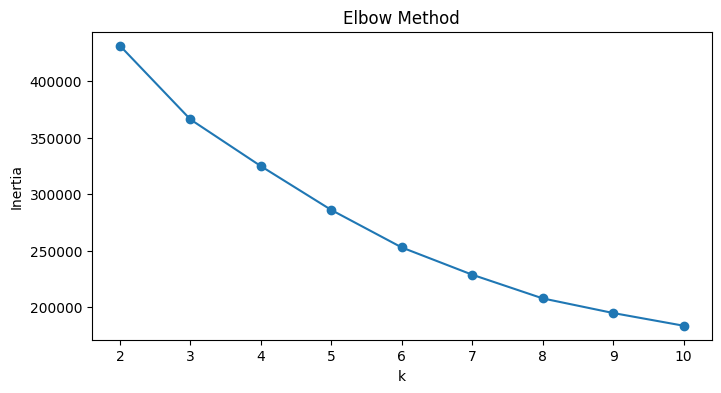

k=2: silhouette=0.6634
k=3: silhouette=0.5605
k=4: silhouette=0.3052
k=5: silhouette=0.3059
k=6: silhouette=0.2695
k=7: silhouette=0.2917
k=8: silhouette=0.2977
k=9: silhouette=0.2888
k=10: silhouette=0.2794


In [82]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
sil_scores = []
k_values = range(2, 11)

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = model.fit_predict(df_scaled)
    inertia.append(model.inertia_)
    sil_scores.append(silhouette_score(df_scaled, labels))


plt.figure(figsize=(8,4))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()

# Печать silhouette score
for k, sil in zip(k_values, sil_scores):
    print(f"k={k}: silhouette={sil:.4f}")

In [98]:
# 1. Выбор признаков
cols = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']
X = df[cols].copy()
X = X.fillna(X.median(numeric_only=True))

# 2. Масштабирование
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from joblib import dump

scaler = RobustScaler().fit(X)
X_scaled = scaler.transform(X)

# 3. Обучение модели K-Means
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42).fit(X_scaled)

print('Количество признаков после скейлинга:', scaler.n_features_in_)
print('Количество кластеров:', kmeans.n_clusters)

# 4. Сохранение артефактов
dump(kmeans, 'kmeans_model.joblib')
dump(scaler, 'scaler.joblib')

# 5. Присвоение кластера каждому клиенту
df_scaled = pd.DataFrame(X_scaled, columns=cols)
df_scaled['cluster'] = kmeans.predict(X_scaled)

df_scaled['cluster'].value_counts()

Количество признаков после скейлинга: 5
Количество кластеров: 2


,count
cluster,
0,8212
1,738


In [99]:
df_with_clusters = df.copy()
df_with_clusters['cluster'] = df_scaled['cluster']

cols_key = ['BALANCE','PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS','TENURE']

profile_mean   = df_with_clusters.groupby('cluster')[cols_key].mean().round(2)
profile_median = df_with_clusters.groupby('cluster')[cols_key].median().round(2)

print("=== Средние значения ===")
display(profile_mean)

print("=== Медианы ===")
display(profile_median)

=== Средние значения ===


,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,TENURE
cluster,,,,,,
0,1298.17,724.92,659.53,4039.91,1155.14,11.50
1,4527.74,4099.81,4532.30,9550.28,8164.77,11.72


=== Медианы ===


,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,TENURE
cluster,,,,,,
0,746.84,339.72,0.0,3000.0,748.43,12.0
1,3804.11,1960.84,3907.9,9000.0,6550.07,12.0


In [100]:
cluster_name = {
    0: "Базовые клиенты (низкая активность)",
    1: "Премиум клиенты (высокая активность)"
}

df_with_clusters['segment'] = df_with_clusters['cluster'].map(cluster_name)
df_with_clusters[['cluster','segment']].value_counts().sort_index()

,,count
cluster,segment,
0,Базовые клиенты (низкая активность),8212
1,Премиум клиенты (высокая активность),738


In [101]:
compare_table = df_with_clusters.groupby('segment',as_index=False)[[
    'BALANCE','PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS','TENURE'
]].mean().round(2)

compare_table

,segment,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,TENURE
0,Базовые клиенты (низкая активность),1298.17,724.92,659.53,4039.91,1155.14,11.50
1,Премиум клиенты (высокая активность),4527.74,4099.81,4532.30,9550.28,8164.77,11.72


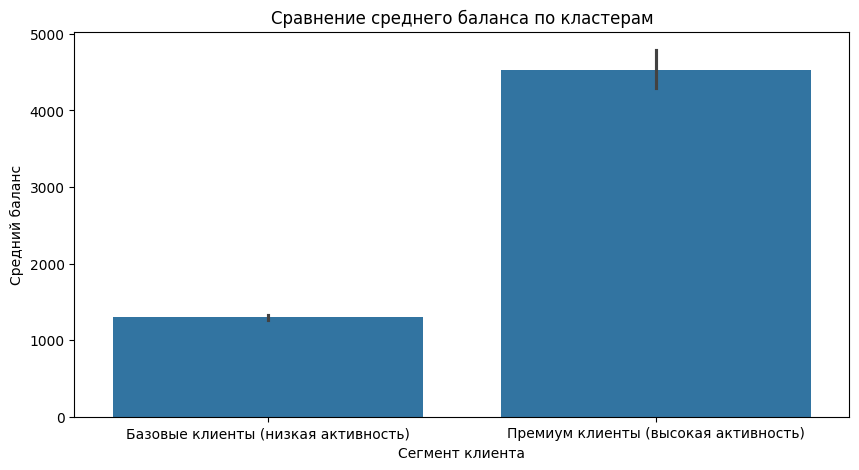

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.barplot(data=df_with_clusters, x='segment', y='BALANCE')
plt.title("Сравнение среднего баланса по кластерам")
plt.ylabel("Средний баланс")
plt.xlabel("Сегмент клиента")
plt.show()

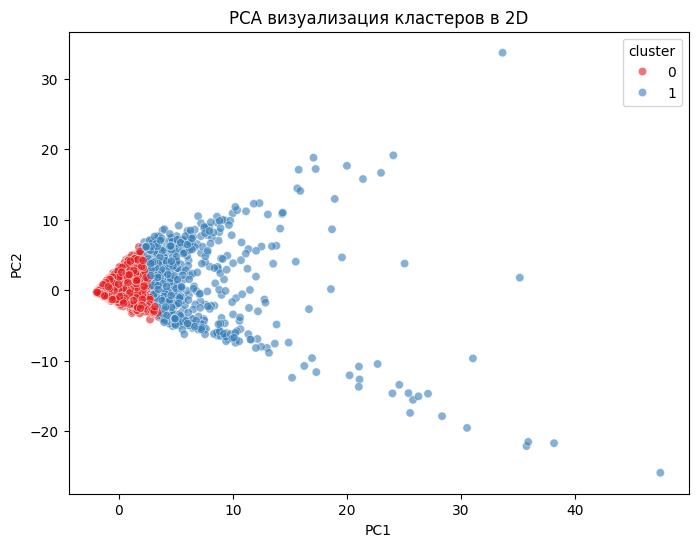

In [103]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


X = df_scaled.drop(columns=['cluster'])


pca = PCA(n_components=2)
components = pca.fit_transform(X)

df_pca = pd.DataFrame(components, columns=['PC1','PC2'])
df_pca['cluster'] = df_scaled['cluster']

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster', palette='Set1', alpha=0.6)
plt.title("PCA визуализация кластеров в 2D")
plt.show()

In [104]:
df_with_clusters.to_csv("clustered_clients.csv", index=False)

*Сегментация выявила 2 ключевых группы клиентов:* **Текст, выделенный полужирным шрифтом**

---

### 🔹 Сегмент A — “Базовые клиенты (низкая активность)” (~95%)
- Низкие траты и платежи  
- Меньшие балансы и кредитные лимиты  
✅ *Потенциал:* стимулирование активности (кэшбэк, рассрочка, upsell)

---

### 🔹 Сегмент B — “Премиум клиенты (высокая активность)” (~5%)
- Высокие траты  
- Большие кредитные лимиты  
- Высокая платёжная дисциплина  
✅ *Рекомендации:* премиальные продукты, travel-привилегии, персональные офферы

---

### 💡 Ценность модели:
- Простая и интерпретируемая
- Легко внедряется в CRM
# - Используются только поведенческие ***признаки***

In [95]:
import joblib

joblib.dump(kmeans, "kmeans_model.joblib")
joblib.dump(scaler, "scaler.joblib")

# Проверяем, что файлы создались
import os
os.listdir()

['.config',
 'clustered_clients.csv',
 'kmeans_model.joblib',
 'scaler.joblib',
 'sample_data']

In [96]:
from google.colab import files
files.download("kmeans_model.joblib")
files.download("scaler.joblib")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>